## Винные обзоры

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [4]:
# импортируем необходимые пакеты

import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('wine.csv') # чтение данных

### Задание 5.1

Составьте чек-лист всех этапов жизненного цикла модели машинного обучения для создания ИИ-сомелье. 
Подробно раскройте процесс разведывательного анализа данных с подэтапами. 


* Определение бизнес-проблемы
* Сбор данных
* Очистка данных от пропусков/выбросов/аномалий
* Разведывательный анализ данных
    + проектирование признаков (генерация из внешних источников данных, из признаков датасета)
    + кодирование признаков
    + проверка статистических гипотез
    + отбор признаков
* Разработка модели
* Вывод модели в продакшн


### Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки

In [6]:
df.nunique() # смотрим на кол-во уникальных признаков

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [7]:
df.info() # посмотрим на типы признаков. Претендента всего 2: points, price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Смотрим на описание признаков и на распределение, чтобы точно убедиться, что они числовые:

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

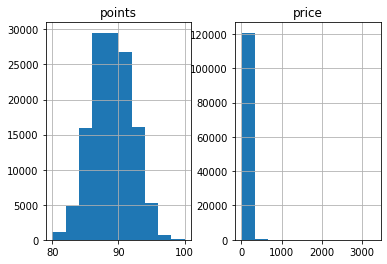

In [4]:
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = df.hist()
hist

Ответ: points, price

### Задание 5.3

Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их. 
В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить. 


In [5]:
mask = df.duplicated(subset=df.columns) # маска для фильтрации
data_duplicates = df[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 9983


### Задание 5.4

Проверьте датасет на наличие пропусков в данных.
В каких из представленных признаках были обнаружены пропуски?


In [6]:
df.info() # смотрим краткую информацию о наборе данных и даем ответ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### Задание 5.5

Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в  PYTHON-14. Очистка данных:

Воспользуйтесь правилами:
    
+ Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
+ Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
+ Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.


<AxesSubplot:>

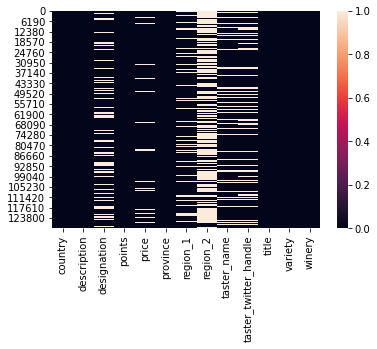

In [7]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

In [8]:
df = df.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

<AxesSubplot:>

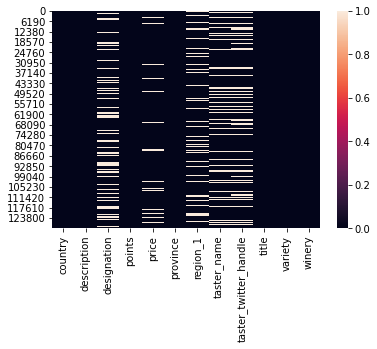

In [9]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [10]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

In [11]:
# в числовом признаке выберем мтод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

<AxesSubplot:>

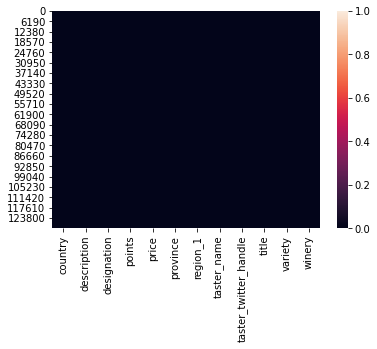

In [12]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [13]:
df = df.to_csv('wine_cleared.csv') # сохраняем очищенный датасет для дальнейшей работы